<a href="https://colab.research.google.com/github/AkshataKishore/IML/blob/master/Feature_Selection_BorutaShap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
%cd /content/drive/My Drive/

Mounted at /content/drive
 Advertising.html
'Akshata KM Resume.pdf'
'Akshata Resume.pdf'
'Colab Notebooks'
'Data Science and Big Data Analytics.pdf'
'Document Back up Boeing '
 Epic_Data_Analysis.ipynb
 Epic_Sample.csv
 FeatureHumana.csv
 holdout.csv
 holdoutmodel.csv
 inputmodel.csv
 interpretable_tree.png
 modeldata.csv
'New_data (1).csv'
 New_data.csv
 NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2017.csv
 OutputResultsHumana.csv
 PCOS_Data.csv
 SWEETVIZ_REPORT.html
'UMD Textbooks'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
'USA Visa Documents'
/content/drive/My Drive


In [2]:
import time,os,json
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') # random state
SEED=100
time_start_notebook = time.time()
home = os.path.expanduser('~')
[(x.__name__,x.__version__) for x in [np,pd,sns]]
import pandas as pd 
df = pd.read_csv('PCOS_Data.csv')
from sklearn.model_selection import train_test_split

target = 'PCOS (Y/N)'

df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    df.drop(target,axis=1), df[target],
    test_size=0.2, random_state=SEED, stratify=df[target])

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

features_train = df_Xtrain.columns.to_list()
features_train

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [4]:
! pip install BorutaShap
! pip install catboost




     |████████████████████████████████| 327kB 3.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456459 sha256=8dd429d31ee00d7ca9cdf699c32a2e90633487f39e6fa9b20f2585b75bc5fe2a
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap
     |████████████████████████████████| 66.2MB 63kB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from BorutaShap import BorutaShap, load_data
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
model = DecisionTreeClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=df_Xtrain, y=ytrain, n_trials=100, random_state=0)

100%|██████████| 100/100 [00:02<00:00, 36.11it/s]

6 attributes confirmed important: ['AMH(ng/mL)', 'BMI', 'Weight gain(Y/N)', 'Fast food (Y/N)', 'hair growth(Y/N)', 'Follicle No. (R)']
31 attributes confirmed unimportant: ['Pulse rate(bpm) ', 'Pregnant(Y/N)', 'No. of aborptions', 'LH(mIU/mL)', 'Avg. F size (L) (mm)', 'Marraige Status (Yrs)', 'Pimples(Y/N)', 'PRL(ng/mL)', 'Skin darkening (Y/N)', 'RR (breaths/min)', 'Hip(inch)', 'Reg.Exercise(Y/N)', 'Cycle length(days)', 'Avg. F size (R) (mm)', 'PRG(ng/mL)', 'BP _Systolic (mmHg)', 'Hair loss(Y/N)', 'FSH(mIU/mL)', 'RBS(mg/dl)', 'Height(Cm) ', ' Age (yrs)', 'BP _Diastolic (mmHg)', 'Weight (Kg)', 'Follicle No. (L)', 'Vit D3 (ng/mL)', 'Cycle(R/I)', 'Endometrium (mm)', 'Blood Group', 'Waist(inch)', 'TSH (mIU/L)', 'Hb(g/dl)']
0 tentative attributes remains: []


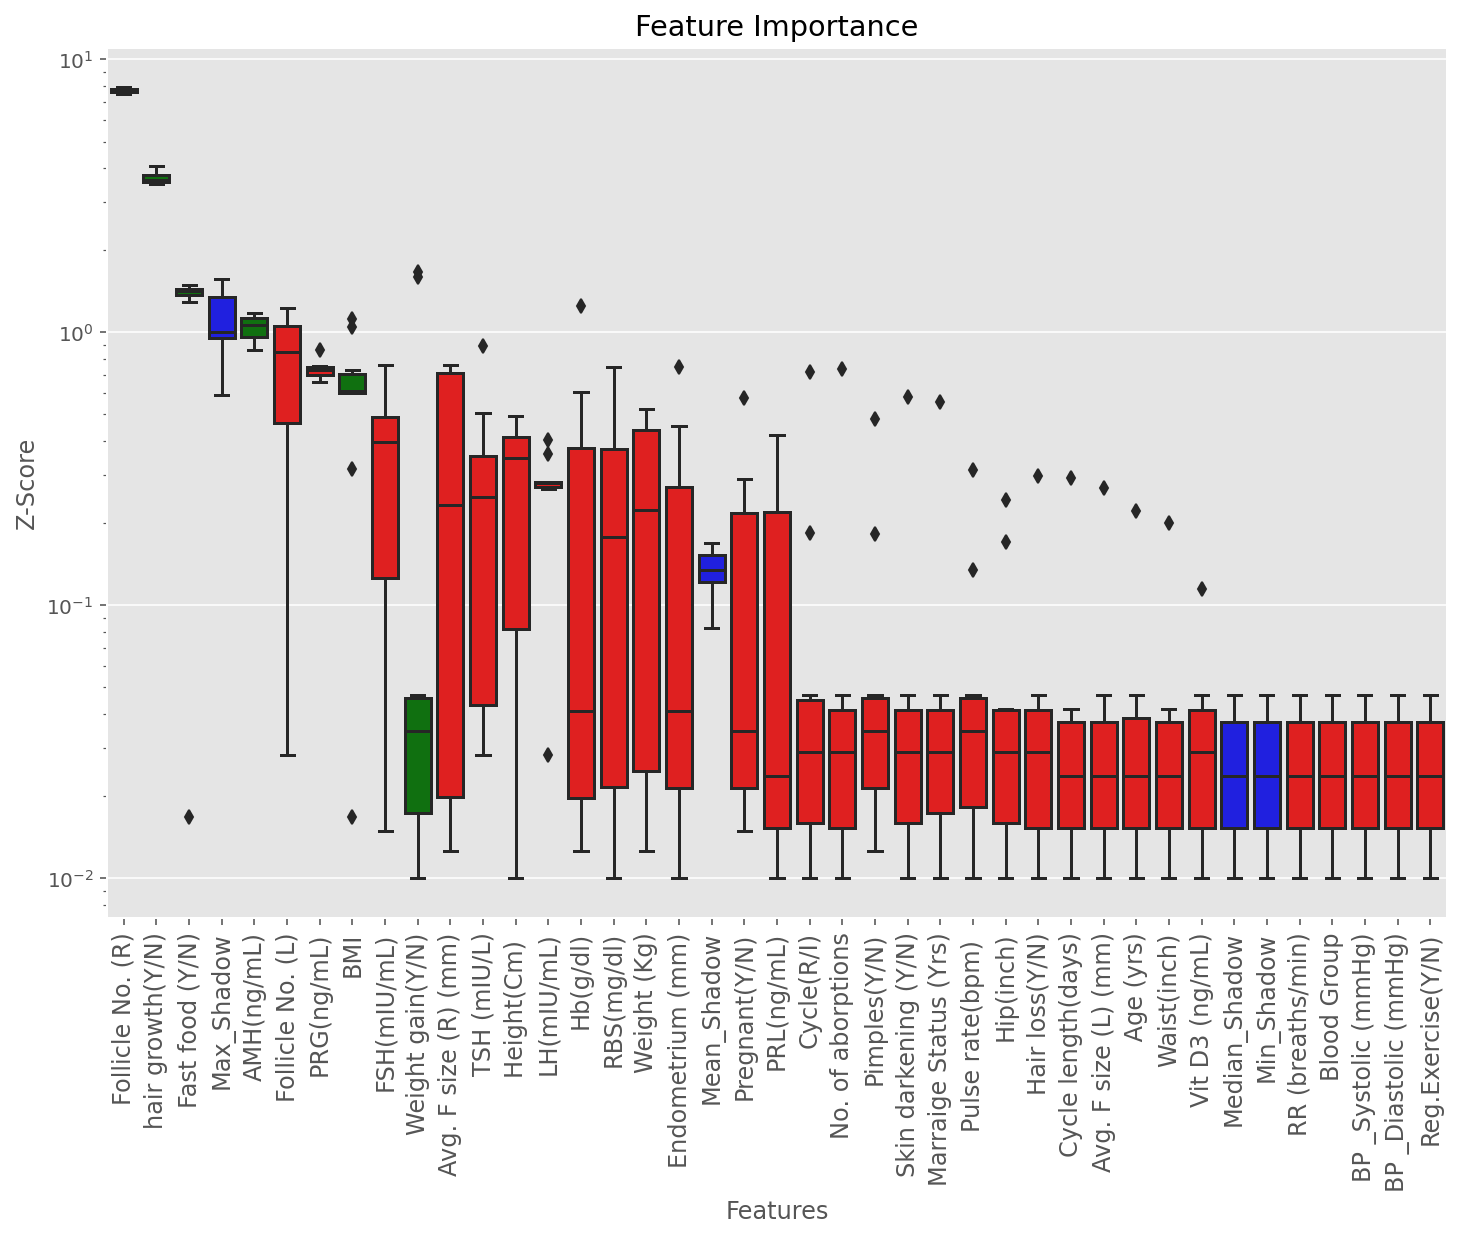

In [7]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [8]:
model = RandomForestClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=df_Xtrain, y=ytrain, n_trials=100, random_state=0)

100%|██████████| 100/100 [01:02<00:00,  1.61it/s]

13 attributes confirmed important: ['AMH(ng/mL)', ' Age (yrs)', 'BMI', 'Weight (Kg)', 'Follicle No. (L)', 'Skin darkening (Y/N)', 'Cycle(R/I)', 'Weight gain(Y/N)', 'Fast food (Y/N)', 'hair growth(Y/N)', 'Follicle No. (R)', 'Hb(g/dl)', 'Cycle length(days)']
22 attributes confirmed unimportant: ['Pulse rate(bpm) ', 'Pregnant(Y/N)', 'Avg. F size (L) (mm)', 'Marraige Status (Yrs)', 'RR (breaths/min)', 'Avg. F size (R) (mm)', 'PRG(ng/mL)', 'BP _Systolic (mmHg)', 'Height(Cm) ', 'BP _Diastolic (mmHg)', 'Endometrium (mm)', 'Waist(inch)', 'TSH (mIU/L)', 'No. of aborptions', 'PRL(ng/mL)', 'Hip(inch)', 'Reg.Exercise(Y/N)', 'Hair loss(Y/N)', 'FSH(mIU/mL)', 'RBS(mg/dl)', 'Vit D3 (ng/mL)', 'Blood Group']
2 tentative attributes remains: ['Pimples(Y/N)', 'LH(mIU/mL)']


In [9]:
model = CatBoostClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=df_Xtrain, y=ytrain, n_trials=100, random_state=0)

100%|██████████| 100/100 [07:40<00:00,  4.61s/it]

10 attributes confirmed important: ['AMH(ng/mL)', ' Age (yrs)', 'Follicle No. (L)', 'Skin darkening (Y/N)', 'Cycle(R/I)', 'Weight gain(Y/N)', 'Fast food (Y/N)', 'hair growth(Y/N)', 'Follicle No. (R)', 'Hb(g/dl)']
27 attributes confirmed unimportant: ['Pulse rate(bpm) ', 'Pregnant(Y/N)', 'Avg. F size (L) (mm)', 'Marraige Status (Yrs)', 'RR (breaths/min)', 'Cycle length(days)', 'Avg. F size (R) (mm)', 'PRG(ng/mL)', 'BP _Systolic (mmHg)', 'Height(Cm) ', 'BP _Diastolic (mmHg)', 'Weight (Kg)', 'Endometrium (mm)', 'Waist(inch)', 'TSH (mIU/L)', 'No. of aborptions', 'LH(mIU/mL)', 'Pimples(Y/N)', 'PRL(ng/mL)', 'Hip(inch)', 'Reg.Exercise(Y/N)', 'Hair loss(Y/N)', 'FSH(mIU/mL)', 'RBS(mg/dl)', 'BMI', 'Vit D3 (ng/mL)', 'Blood Group']
0 tentative attributes remains: []


In [10]:
Feature_Selector.TentativeRoughFix()

0 tentative features are now accepted: []
0 tentative features are now rejected: []


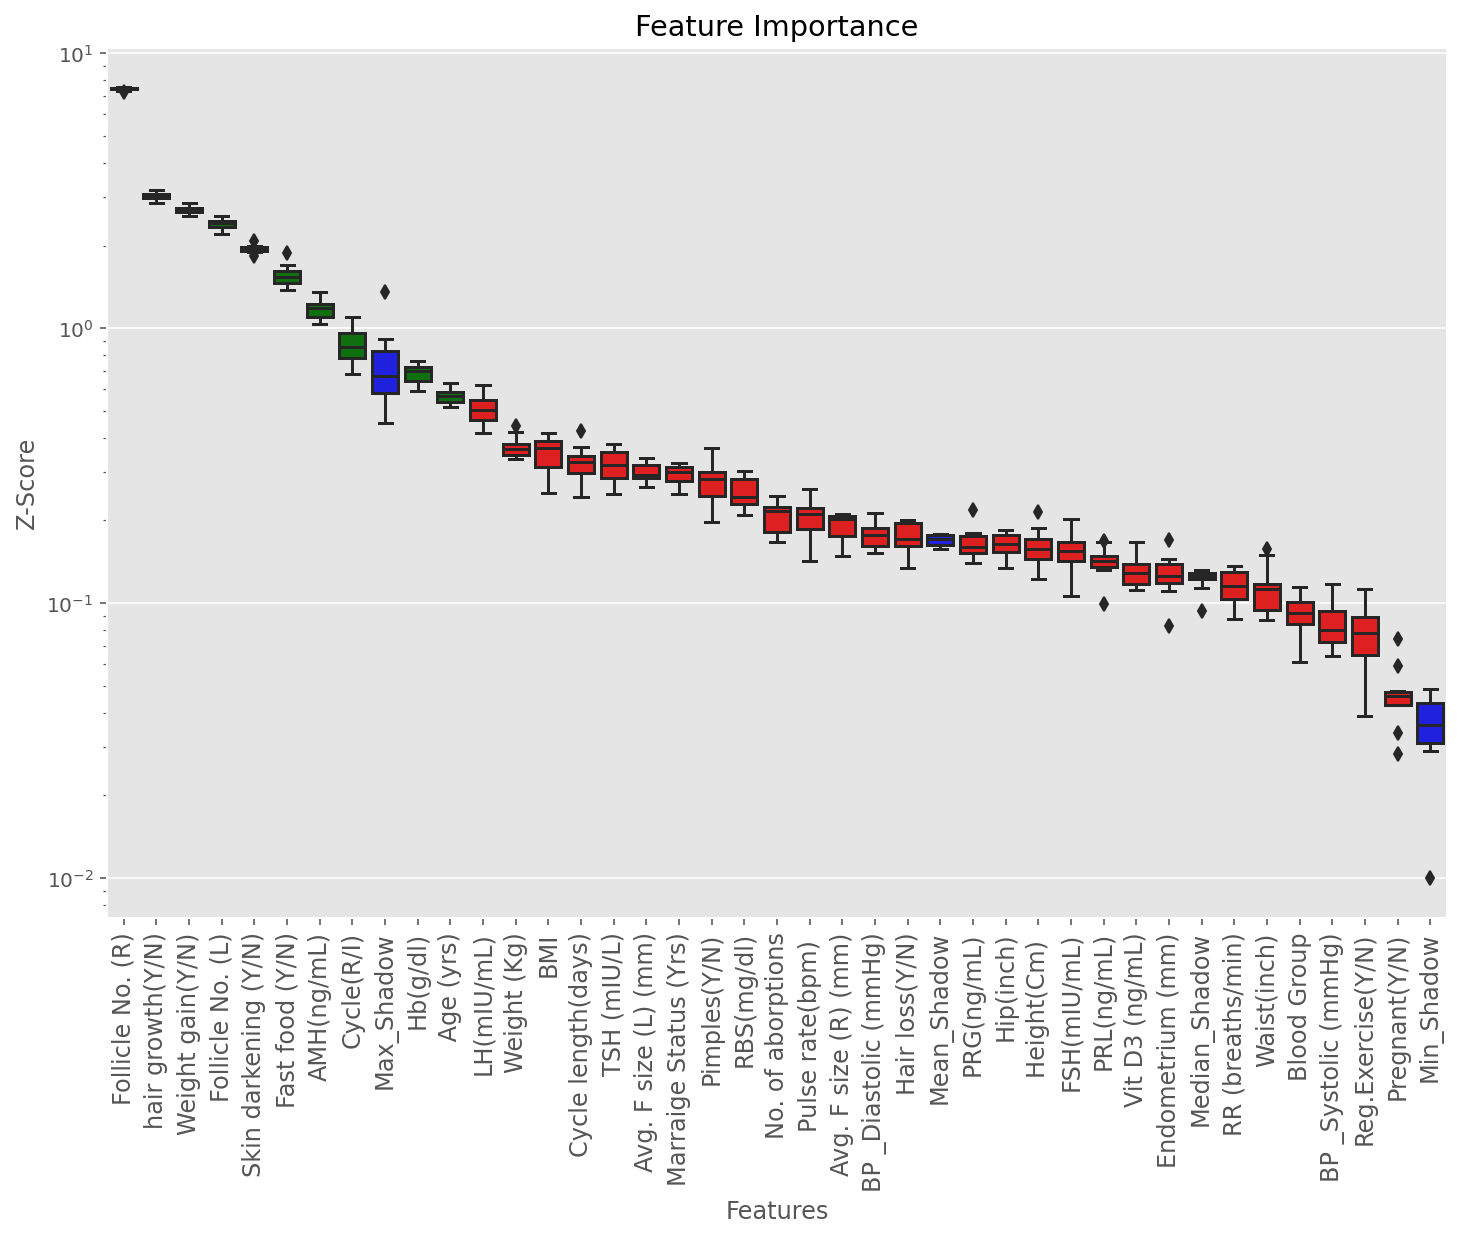

In [11]:

# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [12]:
# save the results to csv filename is called feature_importance
Feature_Selector.results_to_csv(filename='feature_importance')